## Load data

In [1]:
import numpy as np
from keras.utils.np_utils import to_categorical
import keras

Using Theano backend.


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [3]:
datapath = '/media/sf_vmshared/timeseries/eecology/'

In [4]:
from keras.utils.np_utils import to_categorical

In [5]:
ext = '.npz'
X_train = np.load(datapath+'X_train'+ext)['arr_0']
y_train_binary = to_categorical(np.load(datapath+'y_train'+ext)['arr_0'])
X_val = np.load(datapath+'X_val'+ext)['arr_0']
y_val_binary = to_categorical(np.load(datapath+'y_val'+ext)['arr_0'])
X_test = np.load(datapath+'X_test'+ext)['arr_0']
y_test_binary = to_categorical(np.load(datapath+'y_test'+ext)['arr_0'])

In [17]:
print(X_train.shape, X_val.shape, X_test.shape)

(1065, 20, 3) (177, 20, 3) (185, 20, 3)


In [6]:
num_classes = y_train_binary.shape[1]
print(num_classes)

11


## Generate models

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution1D, Flatten, MaxPooling1D
from keras.optimizers import Adam

In [9]:
import sys
import os
import numpy as np
sys.path.insert(0, os.path.abspath('../..'))

from mcfly import modelgen, find_architecture

In [10]:
%%time
models = modelgen.generate_models(X_train.shape,
                                  num_classes,
                                  number_of_models = 25,
                                  #model_type = 'CNN',
                                  #cnn_max_layers=4,
                                  #deepconvlstm_max_conv_layers=3,
                                  #deepconvlstm_max_lstm_layers=2
                                 )

CPU times: user 21.3 s, sys: 2.72 s, total: 24 s
Wall time: 26.7 s


In [11]:
for model, params, model_types in models:
    print(params)
    model.summary()

{'regularization_rate': 0.05141340232089523, 'filters': array([60, 58]), 'lstm_dims': array([53, 44, 13]), 'learning_rate': 0.00021087093159510476}
____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
batchnormalization_1 (BatchNormaliz(None, 20, 3)       6           batchnormalization_input_1[0][0] 
____________________________________________________________________________________________________
reshape_1 (Reshape)                (None, 1, 20, 3)    0           batchnormalization_1[0][0]       
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)    (None, 60, 20, 3)   240         reshape_1[0][0]                  
____________________________________________________________________________________________________
batchnormalization_2 (BatchNormaliz(None, 60

## Compare models

In [18]:
%%time
histories, val_accuracies, val_losses = find_architecture.train_models_on_samples(X_train, y_train_binary,
                                                                                 X_val, y_val_binary,
                                                                                 models,nr_epochs=20,
                                                                                  subset_size=1065,
                                                                                  verbose=True)

Training model 0 DeepConvLSTM
Train on 1065 samples, validate on 177 samples
Epoch 1/20
1065/1065 [==============================] - 8s - loss: 2.8178 - acc: 0.7324 - val_loss: 0.9226 - val_acc: 0.8249
Epoch 2/20
1065/1065 [==============================] - 8s - loss: 2.8211 - acc: 0.7136 - val_loss: 0.9475 - val_acc: 0.8418
Epoch 3/20
1065/1065 [==============================] - 8s - loss: 2.7085 - acc: 0.7343 - val_loss: 0.8951 - val_acc: 0.8701
Epoch 4/20
1065/1065 [==============================] - 8s - loss: 2.6726 - acc: 0.7164 - val_loss: 0.9112 - val_acc: 0.8475
Epoch 5/20
1065/1065 [==============================] - 8s - loss: 2.6306 - acc: 0.7268 - val_loss: 0.9524 - val_acc: 0.8023
Epoch 6/20
1065/1065 [==============================] - 8s - loss: 2.5199 - acc: 0.7399 - val_loss: 1.0691 - val_acc: 0.6667
Epoch 7/20
1065/1065 [==============================] - 8s - loss: 2.4627 - acc: 0.7455 - val_loss: 0.8739 - val_acc: 0.8305
Epoch 8/20
1065/1065 [==========================

INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock


Train on 1065 samples, validate on 177 samples
Epoch 1/20
1065/1065 [==============================] - 17s - loss: 25.0945 - acc: 0.3577 - val_loss: 2.2635 - val_acc: 0.0960
Epoch 2/20
1065/1065 [==============================] - 16s - loss: 16.3223 - acc: 0.5136 - val_loss: 1.3564 - val_acc: 0.4350
Epoch 3/20
1065/1065 [==============================] - 16s - loss: 11.2160 - acc: 0.6141 - val_loss: 1.1858 - val_acc: 0.4350
Epoch 4/20
1065/1065 [==============================] - 16s - loss: 8.0945 - acc: 0.6657 - val_loss: 1.0571 - val_acc: 0.6497
Epoch 5/20
1065/1065 [==============================] - 17s - loss: 6.2482 - acc: 0.6545 - val_loss: 0.8649 - val_acc: 0.7797
Epoch 6/20
1065/1065 [==============================] - 16s - loss: 4.9680 - acc: 0.6836 - val_loss: 1.0348 - val_acc: 0.6271
Epoch 7/20
1065/1065 [==============================] - 17s - loss: 4.1203 - acc: 0.7014 - val_loss: 0.7404 - val_acc: 0.8249
Epoch 8/20
1065/1065 [==============================] - 16s - loss: 

INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock


Train on 1065 samples, validate on 177 samples
Epoch 1/20
1065/1065 [==============================] - 14s - loss: 3.5673 - acc: 0.2873 - val_loss: 2.5071 - val_acc: 0.0339
Epoch 2/20
1065/1065 [==============================] - 13s - loss: 2.6002 - acc: 0.2329 - val_loss: 2.3651 - val_acc: 0.0339
Epoch 3/20
1065/1065 [==============================] - 13s - loss: 2.1038 - acc: 0.2244 - val_loss: 2.2358 - val_acc: 0.0339
Epoch 4/20
1065/1065 [==============================] - 14s - loss: 2.0258 - acc: 0.2413 - val_loss: 2.0727 - val_acc: 0.0339
Epoch 5/20
1065/1065 [==============================] - 35s - loss: 2.0104 - acc: 0.2488 - val_loss: 2.0552 - val_acc: 0.0339
Epoch 6/20
1065/1065 [==============================] - 67s - loss: 2.0184 - acc: 0.2197 - val_loss: 2.2080 - val_acc: 0.0339
Epoch 7/20
1065/1065 [==============================] - 47s - loss: 2.0056 - acc: 0.2451 - val_loss: 2.0983 - val_acc: 0.0339
Epoch 8/20
1065/1065 [==============================] - 36s - loss: 2.0

INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock


Train on 1065 samples, validate on 177 samples
Epoch 1/20
1065/1065 [==============================] - 0s - loss: 3.1107 - acc: 0.3887 - val_loss: 1.3380 - val_acc: 0.6780
Epoch 2/20
1065/1065 [==============================] - 0s - loss: 2.6088 - acc: 0.5474 - val_loss: 1.1778 - val_acc: 0.8305
Epoch 3/20
1065/1065 [==============================] - 0s - loss: 2.3588 - acc: 0.6357 - val_loss: 1.0455 - val_acc: 0.8870
Epoch 4/20
1065/1065 [==============================] - 0s - loss: 2.1689 - acc: 0.6836 - val_loss: 0.9751 - val_acc: 0.8927
Epoch 5/20
1065/1065 [==============================] - 0s - loss: 2.0328 - acc: 0.7127 - val_loss: 0.8924 - val_acc: 0.8701
Epoch 6/20
1065/1065 [==============================] - 0s - loss: 1.8600 - acc: 0.7362 - val_loss: 0.9598 - val_acc: 0.8079
Epoch 7/20
1065/1065 [==============================] - 0s - loss: 1.7422 - acc: 0.7756 - val_loss: 0.9007 - val_acc: 0.8701
Epoch 8/20
1065/1065 [==============================] - 0s - loss: 1.6592 - ac

INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock


Train on 1065 samples, validate on 177 samples
Epoch 1/20
1065/1065 [==============================] - 6s - loss: 2.2955 - acc: 0.1981 - val_loss: 2.1241 - val_acc: 0.0339
Epoch 2/20
1065/1065 [==============================] - 6s - loss: 2.0382 - acc: 0.2376 - val_loss: 2.0868 - val_acc: 0.0339
Epoch 3/20
1065/1065 [==============================] - 6s - loss: 2.0112 - acc: 0.2488 - val_loss: 2.2159 - val_acc: 0.0339
Epoch 4/20
1065/1065 [==============================] - 6s - loss: 2.0119 - acc: 0.2272 - val_loss: 2.3380 - val_acc: 0.0339
Epoch 5/20
1065/1065 [==============================] - 9s - loss: 2.0032 - acc: 0.2498 - val_loss: 2.1720 - val_acc: 0.0339
Epoch 6/20
1065/1065 [==============================] - 9s - loss: 2.0078 - acc: 0.2272 - val_loss: 2.1360 - val_acc: 0.0339
Epoch 7/20
1065/1065 [==============================] - 10s - loss: 2.0041 - acc: 0.2338 - val_loss: 2.1318 - val_acc: 0.0339
Epoch 8/20
1065/1065 [==============================] - 8s - loss: 2.0122 - a

INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock


Train on 1065 samples, validate on 177 samples
Epoch 1/20
1065/1065 [==============================] - 2s - loss: 6.7989 - acc: 0.4751 - val_loss: 1.5572 - val_acc: 0.5028
Epoch 2/20
1065/1065 [==============================] - 2s - loss: 2.1952 - acc: 0.5681 - val_loss: 1.1538 - val_acc: 0.7797
Epoch 3/20
1065/1065 [==============================] - 2s - loss: 1.8688 - acc: 0.5784 - val_loss: 0.7603 - val_acc: 0.8814
Epoch 4/20
1065/1065 [==============================] - 2s - loss: 1.8669 - acc: 0.5897 - val_loss: 0.8064 - val_acc: 0.8757
Epoch 5/20
1065/1065 [==============================] - 2s - loss: 1.7019 - acc: 0.6009 - val_loss: 1.0743 - val_acc: 0.7514
Epoch 6/20
1065/1065 [==============================] - 2s - loss: 1.7321 - acc: 0.5972 - val_loss: 0.9032 - val_acc: 0.6554
Epoch 7/20
1065/1065 [==============================] - 2s - loss: 1.7110 - acc: 0.6244 - val_loss: 0.9496 - val_acc: 0.6328
Epoch 8/20
1065/1065 [==============================] - 2s - loss: 1.8363 - ac

INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock


Train on 1065 samples, validate on 177 samples
Epoch 1/20
1065/1065 [==============================] - 7s - loss: 7.4134 - acc: 0.5202 - val_loss: 1.4563 - val_acc: 0.5480
Epoch 2/20
1065/1065 [==============================] - 6s - loss: 2.6550 - acc: 0.5859 - val_loss: 7.1729 - val_acc: 0.0960
Epoch 3/20
1065/1065 [==============================] - 5s - loss: 2.3582 - acc: 0.5784 - val_loss: 3.1892 - val_acc: 0.4068
Epoch 4/20
1065/1065 [==============================] - 6s - loss: 2.2854 - acc: 0.5108 - val_loss: 1.0685 - val_acc: 0.4068
Epoch 5/20
1065/1065 [==============================] - 5s - loss: 1.9030 - acc: 0.5925 - val_loss: 1.7857 - val_acc: 0.2147
Epoch 6/20
1065/1065 [==============================] - 6s - loss: 1.8720 - acc: 0.5803 - val_loss: 1.8348 - val_acc: 0.1808
Epoch 7/20
1065/1065 [==============================] - 6s - loss: 1.7882 - acc: 0.6188 - val_loss: 8.5837 - val_acc: 0.0678
Epoch 8/20
1065/1065 [==============================] - 6s - loss: 1.8566 - ac

INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock


Train on 1065 samples, validate on 177 samples
Epoch 1/20
1065/1065 [==============================] - 11s - loss: 4.3151 - acc: 0.3155 - val_loss: 1.5438 - val_acc: 0.3842
Epoch 2/20
1065/1065 [==============================] - 11s - loss: 1.9926 - acc: 0.4282 - val_loss: 1.6020 - val_acc: 0.3898
Epoch 3/20
1065/1065 [==============================] - 10s - loss: 1.8064 - acc: 0.4695 - val_loss: 1.5391 - val_acc: 0.4124
Epoch 4/20
1065/1065 [==============================] - 10s - loss: 1.7245 - acc: 0.4836 - val_loss: 1.5135 - val_acc: 0.4294
Epoch 5/20
1065/1065 [==============================] - 10s - loss: 1.6272 - acc: 0.5277 - val_loss: 1.5681 - val_acc: 0.4294
Epoch 6/20
1065/1065 [==============================] - 11s - loss: 1.5498 - acc: 0.5390 - val_loss: 1.1883 - val_acc: 0.4237
Epoch 7/20
1065/1065 [==============================] - 12s - loss: 1.5424 - acc: 0.5258 - val_loss: 1.3325 - val_acc: 0.4237
Epoch 8/20
1065/1065 [==============================] - 12s - loss: 1.5

INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock


Train on 1065 samples, validate on 177 samples
Epoch 1/20
1065/1065 [==============================] - 15s - loss: 2.3230 - acc: 0.3239 - val_loss: 1.6191 - val_acc: 0.3842
Epoch 2/20
1065/1065 [==============================] - 14s - loss: 1.8985 - acc: 0.4357 - val_loss: 1.5222 - val_acc: 0.3842
Epoch 3/20
1065/1065 [==============================] - 15s - loss: 1.7619 - acc: 0.4451 - val_loss: 1.3965 - val_acc: 0.4181
Epoch 4/20
1065/1065 [==============================] - 14s - loss: 1.5494 - acc: 0.5408 - val_loss: 1.3567 - val_acc: 0.4294
Epoch 5/20
1065/1065 [==============================] - 14s - loss: 1.5380 - acc: 0.5089 - val_loss: 1.2232 - val_acc: 0.4633
Epoch 6/20
1065/1065 [==============================] - 14s - loss: 1.8179 - acc: 0.4601 - val_loss: 1.3909 - val_acc: 0.4068
Epoch 7/20
1065/1065 [==============================] - 15s - loss: 1.8822 - acc: 0.4761 - val_loss: 2.1365 - val_acc: 0.0904
Epoch 8/20
1065/1065 [==============================] - 14s - loss: 1.8

INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock


Train on 1065 samples, validate on 177 samples
Epoch 1/20
1065/1065 [==============================] - 4s - loss: 1.8421 - acc: 0.5164 - val_loss: 0.8250 - val_acc: 0.7740
Epoch 2/20
1065/1065 [==============================] - 5s - loss: 1.4441 - acc: 0.6329 - val_loss: 0.7944 - val_acc: 0.8362
Epoch 3/20
1065/1065 [==============================] - 4s - loss: 1.2020 - acc: 0.7108 - val_loss: 0.6215 - val_acc: 0.8814
Epoch 4/20
1065/1065 [==============================] - 4s - loss: 1.1782 - acc: 0.7061 - val_loss: 0.4801 - val_acc: 0.8983
Epoch 5/20
1065/1065 [==============================] - 4s - loss: 1.0565 - acc: 0.7446 - val_loss: 0.6008 - val_acc: 0.8362
Epoch 6/20
1065/1065 [==============================] - 4s - loss: 1.0072 - acc: 0.7371 - val_loss: 0.4691 - val_acc: 0.8870
Epoch 7/20
1065/1065 [==============================] - 4s - loss: 0.9682 - acc: 0.7399 - val_loss: 0.3359 - val_acc: 0.9322
Epoch 8/20
1065/1065 [==============================] - 4s - loss: 0.8982 - ac

INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock


Train on 1065 samples, validate on 177 samples
Epoch 1/20
1065/1065 [==============================] - 3s - loss: 7.1698 - acc: 0.4000 - val_loss: 1.5208 - val_acc: 0.4746
Epoch 2/20
1065/1065 [==============================] - 3s - loss: 6.5242 - acc: 0.6122 - val_loss: 1.2733 - val_acc: 0.6667
Epoch 3/20
1065/1065 [==============================] - 3s - loss: 6.1579 - acc: 0.7089 - val_loss: 1.1457 - val_acc: 0.7175
Epoch 4/20
1065/1065 [==============================] - 3s - loss: 5.8874 - acc: 0.7333 - val_loss: 1.0912 - val_acc: 0.8023
Epoch 5/20
1065/1065 [==============================] - 3s - loss: 5.6179 - acc: 0.7596 - val_loss: 0.9947 - val_acc: 0.8305
Epoch 6/20
1065/1065 [==============================] - 4s - loss: 5.3537 - acc: 0.7869 - val_loss: 1.1252 - val_acc: 0.7910
Epoch 7/20
1065/1065 [==============================] - 3s - loss: 5.0985 - acc: 0.8131 - val_loss: 0.9660 - val_acc: 0.8418
Epoch 8/20
1065/1065 [==============================] - 3s - loss: 4.8631 - ac

INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock


Train on 1065 samples, validate on 177 samples
Epoch 1/20
1065/1065 [==============================] - 21s - loss: 2.9873 - acc: 0.1793 - val_loss: 2.1561 - val_acc: 0.0339
Epoch 2/20
1065/1065 [==============================] - 22s - loss: 2.0783 - acc: 0.2066 - val_loss: 2.3345 - val_acc: 0.0339
Epoch 3/20
1065/1065 [==============================] - 46s - loss: 2.0621 - acc: 0.2300 - val_loss: 2.1928 - val_acc: 0.0339
Epoch 4/20
1065/1065 [==============================] - 104s - loss: 2.0475 - acc: 0.2319 - val_loss: 1.9510 - val_acc: 0.0339
Epoch 5/20
1065/1065 [==============================] - 90s - loss: 2.0469 - acc: 0.2188 - val_loss: 2.0508 - val_acc: 0.0339
Epoch 6/20
1065/1065 [==============================] - 71s - loss: 2.0489 - acc: 0.2291 - val_loss: 2.1104 - val_acc: 0.0339
Epoch 7/20
1065/1065 [==============================] - 62s - loss: 2.0448 - acc: 0.2310 - val_loss: 2.1851 - val_acc: 0.0339
Epoch 8/20
1065/1065 [==============================] - 49s - loss: 2.

INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock


Train on 1065 samples, validate on 177 samples
Epoch 1/20
1065/1065 [==============================] - 5s - loss: 9.4976 - acc: 0.4798 - val_loss: 2.3154 - val_acc: 0.0678
Epoch 2/20
1065/1065 [==============================] - 5s - loss: 3.0683 - acc: 0.5352 - val_loss: 2.4033 - val_acc: 0.1921
Epoch 3/20
1065/1065 [==============================] - 5s - loss: 2.3079 - acc: 0.5258 - val_loss: 3.0983 - val_acc: 0.0339
Epoch 4/20
1065/1065 [==============================] - 5s - loss: 2.6119 - acc: 0.4939 - val_loss: 1.7997 - val_acc: 0.3333
Epoch 5/20
1065/1065 [==============================] - 5s - loss: 2.0704 - acc: 0.5427 - val_loss: 1.3064 - val_acc: 0.5593
Epoch 6/20
1065/1065 [==============================] - 5s - loss: 3.3130 - acc: 0.5230 - val_loss: 2.8505 - val_acc: 0.0508
Epoch 7/20
1065/1065 [==============================] - 6s - loss: 3.6559 - acc: 0.4779 - val_loss: 1.9866 - val_acc: 0.5198
Epoch 8/20
1065/1065 [==============================] - 6s - loss: 2.4293 - ac

INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock


Train on 1065 samples, validate on 177 samples
Epoch 1/20
1065/1065 [==============================] - 13s - loss: 2.2466 - acc: 0.3615 - val_loss: 1.0154 - val_acc: 0.3955
Epoch 2/20
1065/1065 [==============================] - 12s - loss: 1.7745 - acc: 0.3897 - val_loss: 1.1875 - val_acc: 0.4124
Epoch 3/20
1065/1065 [==============================] - 12s - loss: 1.6239 - acc: 0.4535 - val_loss: 1.1836 - val_acc: 0.3898
Epoch 4/20
1065/1065 [==============================] - 13s - loss: 1.6662 - acc: 0.4582 - val_loss: 1.4252 - val_acc: 0.3955
Epoch 5/20
1065/1065 [==============================] - 12s - loss: 1.5106 - acc: 0.5230 - val_loss: 1.2510 - val_acc: 0.3955
Epoch 6/20
1065/1065 [==============================] - 13s - loss: 1.5410 - acc: 0.5446 - val_loss: 1.2071 - val_acc: 0.4237
Epoch 7/20
1065/1065 [==============================] - 13s - loss: 1.3404 - acc: 0.5944 - val_loss: 1.3336 - val_acc: 0.3955
Epoch 8/20
1065/1065 [==============================] - 13s - loss: 1.3

INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock


Train on 1065 samples, validate on 177 samples
Epoch 1/20
1065/1065 [==============================] - 1s - loss: 2.3153 - acc: 0.4920 - val_loss: 1.2426 - val_acc: 0.7062
Epoch 2/20
1065/1065 [==============================] - 0s - loss: 1.7064 - acc: 0.6723 - val_loss: 1.0639 - val_acc: 0.7175
Epoch 3/20
1065/1065 [==============================] - 0s - loss: 1.4314 - acc: 0.6864 - val_loss: 0.8286 - val_acc: 0.8475
Epoch 4/20
1065/1065 [==============================] - 0s - loss: 1.1829 - acc: 0.7418 - val_loss: 0.8382 - val_acc: 0.8249
Epoch 5/20
1065/1065 [==============================] - 0s - loss: 1.0675 - acc: 0.7681 - val_loss: 0.6778 - val_acc: 0.8362
Epoch 6/20
1065/1065 [==============================] - 0s - loss: 0.9945 - acc: 0.7728 - val_loss: 0.6963 - val_acc: 0.8136
Epoch 7/20
1065/1065 [==============================] - 1s - loss: 0.9452 - acc: 0.7737 - val_loss: 0.7775 - val_acc: 0.7458
Epoch 8/20
1065/1065 [==============================] - 0s - loss: 0.8822 - ac

INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock


Train on 1065 samples, validate on 177 samples
Epoch 1/20
1065/1065 [==============================] - 5s - loss: 8.5892 - acc: 0.5249 - val_loss: 1.0653 - val_acc: 0.7627
Epoch 2/20
1065/1065 [==============================] - 5s - loss: 5.0886 - acc: 0.6864 - val_loss: 0.7241 - val_acc: 0.9153
Epoch 3/20
1065/1065 [==============================] - 6s - loss: 3.9948 - acc: 0.6995 - val_loss: 1.0257 - val_acc: 0.8079
Epoch 4/20
1065/1065 [==============================] - 6s - loss: 3.2497 - acc: 0.7512 - val_loss: 1.0062 - val_acc: 0.8136
Epoch 5/20
1065/1065 [==============================] - 6s - loss: 2.7997 - acc: 0.7540 - val_loss: 0.8478 - val_acc: 0.8644
Epoch 6/20
1065/1065 [==============================] - 6s - loss: 2.5063 - acc: 0.7502 - val_loss: 0.8716 - val_acc: 0.7740
Epoch 7/20
1065/1065 [==============================] - 5s - loss: 2.2018 - acc: 0.7812 - val_loss: 0.5872 - val_acc: 0.8644
Epoch 8/20
1065/1065 [==============================] - 5s - loss: 2.0286 - ac

INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock


Train on 1065 samples, validate on 177 samples
Epoch 1/20
1065/1065 [==============================] - 5s - loss: 2.2707 - acc: 0.5559 - val_loss: 1.0022 - val_acc: 0.7853
Epoch 2/20
1065/1065 [==============================] - 5s - loss: 1.6367 - acc: 0.6667 - val_loss: 0.8908 - val_acc: 0.8136
Epoch 3/20
1065/1065 [==============================] - 5s - loss: 1.4085 - acc: 0.6742 - val_loss: 0.4684 - val_acc: 0.9266
Epoch 4/20
1065/1065 [==============================] - 5s - loss: 1.3255 - acc: 0.6986 - val_loss: 0.4873 - val_acc: 0.8870
Epoch 5/20
1065/1065 [==============================] - 5s - loss: 1.2542 - acc: 0.7023 - val_loss: 0.8932 - val_acc: 0.7175
Epoch 6/20
1065/1065 [==============================] - 5s - loss: 1.2232 - acc: 0.7230 - val_loss: 0.4169 - val_acc: 0.9096
Epoch 7/20
1065/1065 [==============================] - 5s - loss: 1.2176 - acc: 0.7080 - val_loss: 0.3584 - val_acc: 0.9322
Epoch 8/20
1065/1065 [==============================] - 5s - loss: 1.1332 - ac

INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock


Train on 1065 samples, validate on 177 samples
Epoch 1/20
1065/1065 [==============================] - 5s - loss: 6.6451 - acc: 0.4948 - val_loss: 1.7530 - val_acc: 0.3503
Epoch 2/20
1065/1065 [==============================] - 5s - loss: 2.6929 - acc: 0.5052 - val_loss: 1.1313 - val_acc: 0.4181
Epoch 3/20
1065/1065 [==============================] - 5s - loss: 2.0665 - acc: 0.5371 - val_loss: 1.4754 - val_acc: 0.7006
Epoch 4/20
1065/1065 [==============================] - 5s - loss: 1.8958 - acc: 0.5408 - val_loss: 1.1028 - val_acc: 0.6554
Epoch 5/20
1065/1065 [==============================] - 5s - loss: 1.6597 - acc: 0.5399 - val_loss: 1.9990 - val_acc: 0.1243
Epoch 6/20
1065/1065 [==============================] - 5s - loss: 1.5766 - acc: 0.5446 - val_loss: 2.4061 - val_acc: 0.2542
Epoch 7/20
1065/1065 [==============================] - 5s - loss: 1.8449 - acc: 0.5249 - val_loss: 2.1425 - val_acc: 0.5424
Epoch 8/20
1065/1065 [==============================] - 5s - loss: 1.5791 - ac

INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock


Train on 1065 samples, validate on 177 samples
Epoch 1/20
1065/1065 [==============================] - 11s - loss: 2.7536 - acc: 0.4714 - val_loss: 0.9738 - val_acc: 0.7684
Epoch 2/20
1065/1065 [==============================] - 11s - loss: 2.0136 - acc: 0.6310 - val_loss: 0.8475 - val_acc: 0.8136
Epoch 3/20
1065/1065 [==============================] - 13s - loss: 1.7505 - acc: 0.6826 - val_loss: 0.9643 - val_acc: 0.7401
Epoch 4/20
1065/1065 [==============================] - 14s - loss: 1.5460 - acc: 0.7146 - val_loss: 0.6421 - val_acc: 0.8362
Epoch 5/20
1065/1065 [==============================] - 12s - loss: 1.3893 - acc: 0.7512 - val_loss: 0.3916 - val_acc: 0.9322
Epoch 6/20
1065/1065 [==============================] - 12s - loss: 1.3400 - acc: 0.7380 - val_loss: 0.5326 - val_acc: 0.8927
Epoch 7/20
1065/1065 [==============================] - 12s - loss: 1.3111 - acc: 0.7446 - val_loss: 0.4832 - val_acc: 0.8983
Epoch 8/20
1065/1065 [==============================] - 12s - loss: 1.1

INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock


Train on 1065 samples, validate on 177 samples
Epoch 1/20
1065/1065 [==============================] - 12s - loss: 19.9332 - acc: 0.4310 - val_loss: 1.1794 - val_acc: 0.4124
Epoch 2/20
1065/1065 [==============================] - 13s - loss: 5.6622 - acc: 0.5690 - val_loss: 1.2701 - val_acc: 0.5763
Epoch 3/20
1065/1065 [==============================] - 13s - loss: 3.0533 - acc: 0.5793 - val_loss: 1.2885 - val_acc: 0.3390
Epoch 4/20
1065/1065 [==============================] - 13s - loss: 2.3044 - acc: 0.5831 - val_loss: 0.9615 - val_acc: 0.4068
Epoch 5/20
1065/1065 [==============================] - 13s - loss: 2.0633 - acc: 0.5746 - val_loss: 1.1447 - val_acc: 0.4350
Epoch 6/20
1065/1065 [==============================] - 13s - loss: 1.7770 - acc: 0.6197 - val_loss: 0.9377 - val_acc: 0.6384
Epoch 7/20
1065/1065 [==============================] - 15s - loss: 1.6391 - acc: 0.6188 - val_loss: 0.8123 - val_acc: 0.8305
Epoch 8/20
1065/1065 [==============================] - 13s - loss: 1.

INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/christiaan/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-3.5.2-64/lock_dir/lock


Train on 1065 samples, validate on 177 samples
Epoch 1/20
1065/1065 [==============================] - 12s - loss: 2.4295 - acc: 0.3155 - val_loss: 1.8726 - val_acc: 0.5650
Epoch 2/20
1065/1065 [==============================] - 13s - loss: 2.0758 - acc: 0.4798 - val_loss: 1.5312 - val_acc: 0.6215
Epoch 3/20
1065/1065 [==============================] - 12s - loss: 1.8064 - acc: 0.5700 - val_loss: 1.1969 - val_acc: 0.8136
Epoch 4/20
1065/1065 [==============================] - 13s - loss: 1.5900 - acc: 0.6244 - val_loss: 0.9651 - val_acc: 0.8588
Epoch 5/20
1065/1065 [==============================] - 13s - loss: 1.4263 - acc: 0.6723 - val_loss: 0.8158 - val_acc: 0.8588
Epoch 6/20
1065/1065 [==============================] - 12s - loss: 1.3224 - acc: 0.7108 - val_loss: 0.6794 - val_acc: 0.9153
Epoch 7/20
1065/1065 [==============================] - 12s - loss: 1.2382 - acc: 0.7446 - val_loss: 0.8663 - val_acc: 0.7345
Epoch 8/20
1065/1065 [==============================] - 12s - loss: 1.2

In [24]:
m = models[0]
for i in range(len(models)):
    find_architecture.store_train_hist_as_json(models[i][1], models[i][2], histories[i].history, 'fall.json')

/home/christiaan/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


CPU times: user 2.67 s, sys: 180 ms, total: 2.85 s
Wall time: 6.32 s


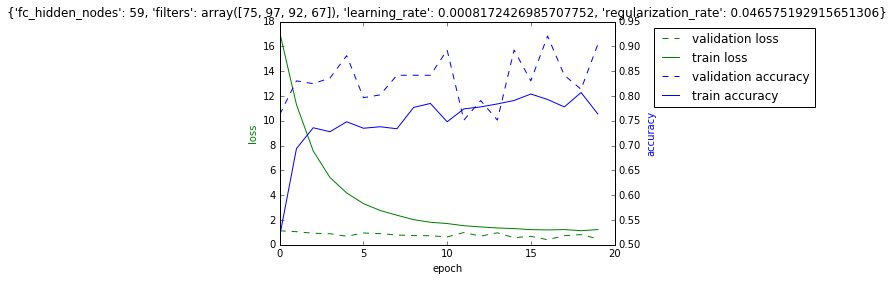

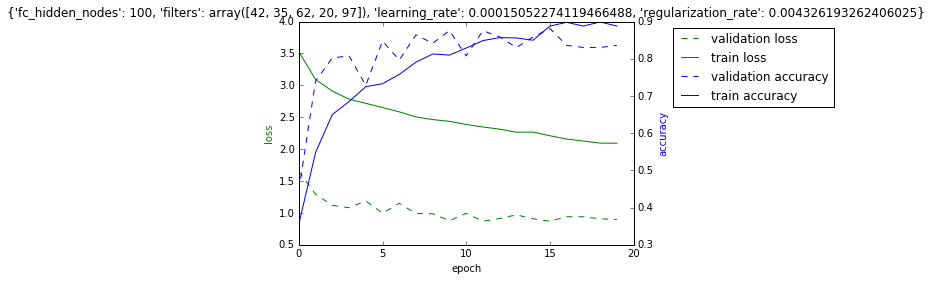

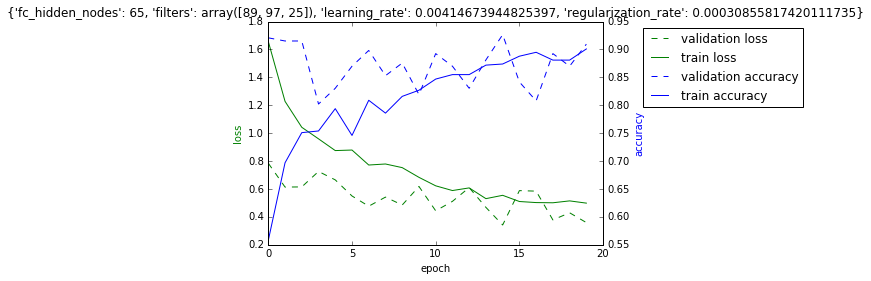

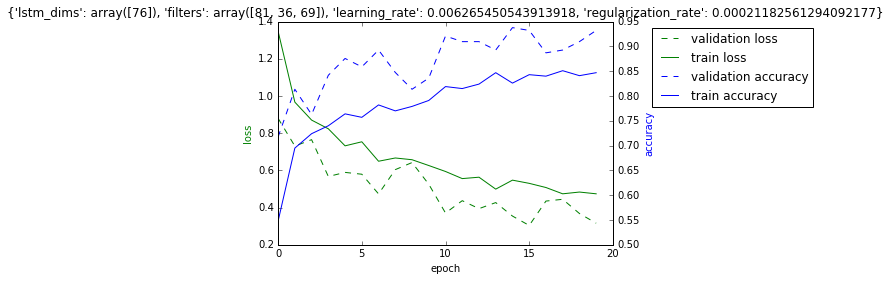

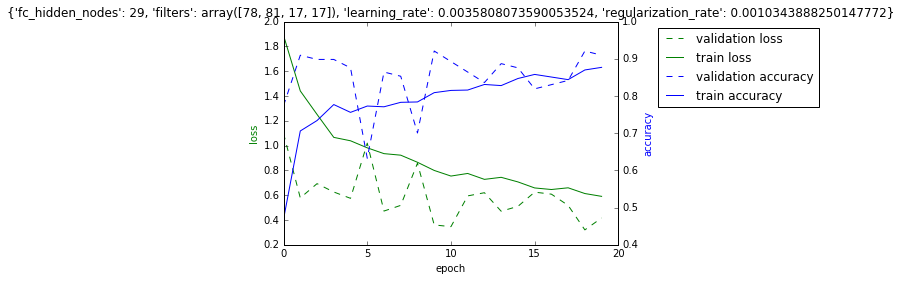

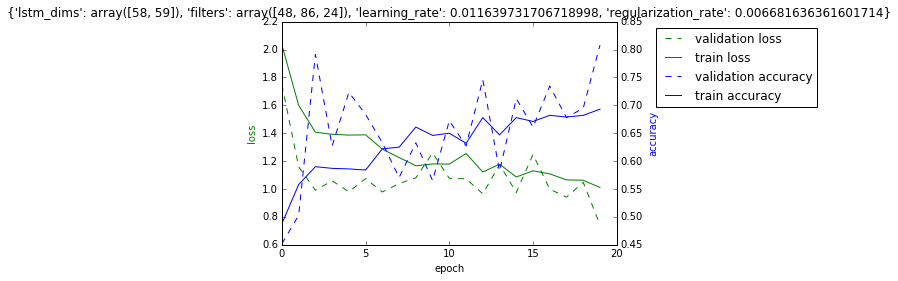

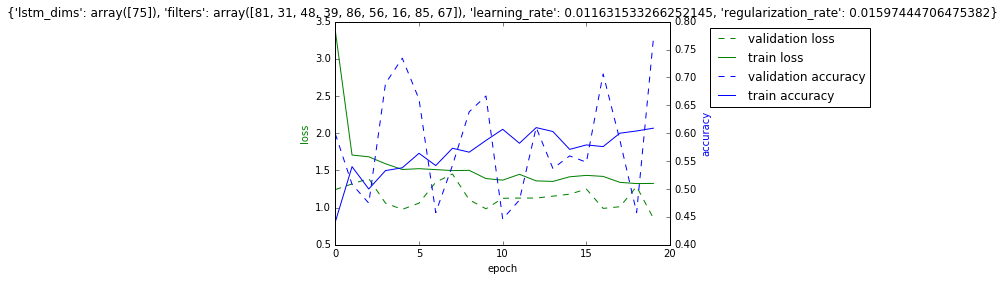

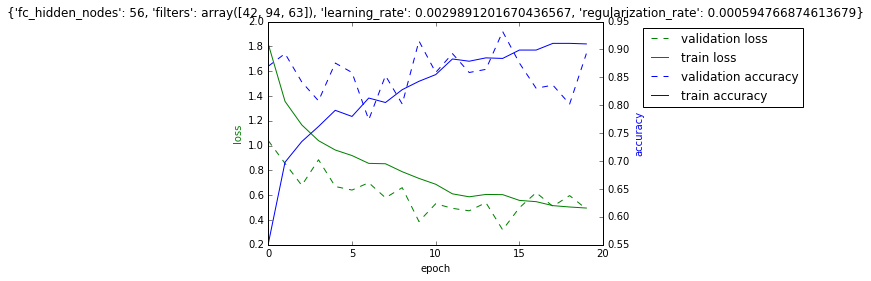

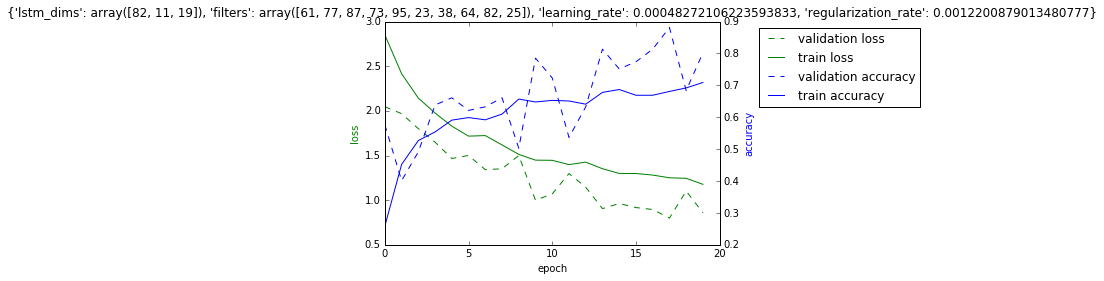

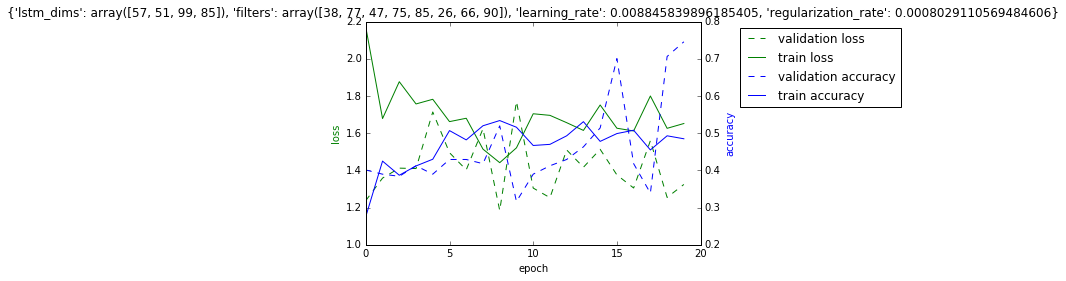

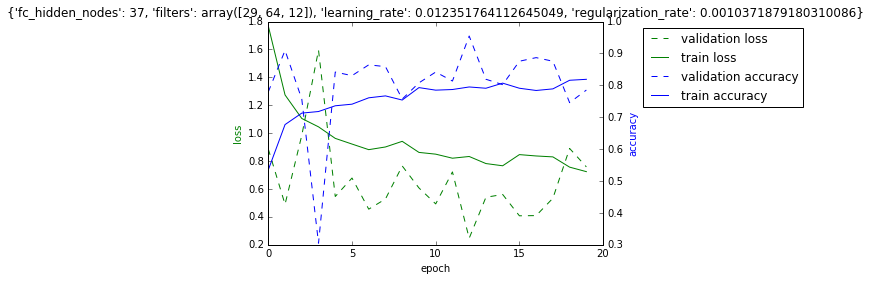

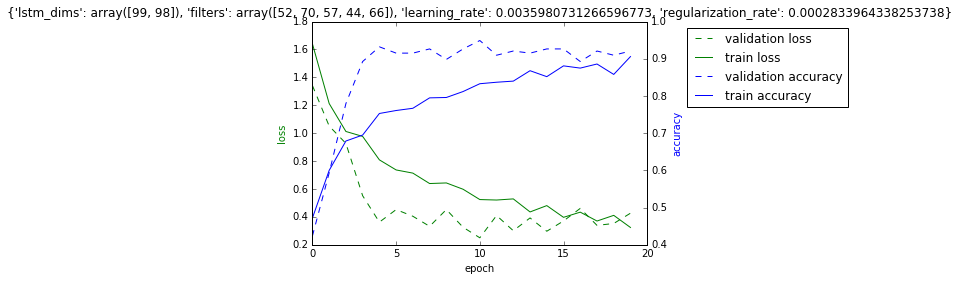

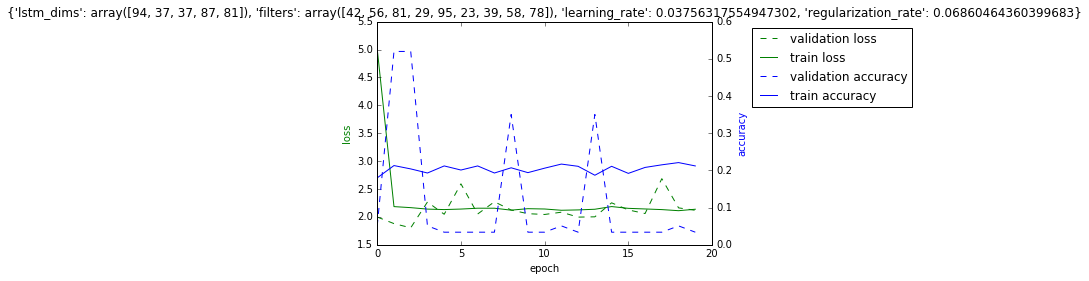

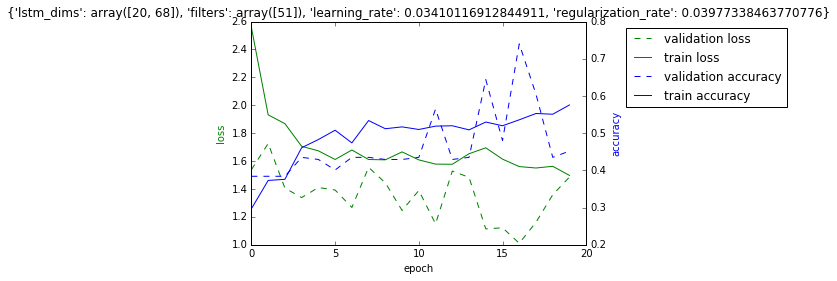

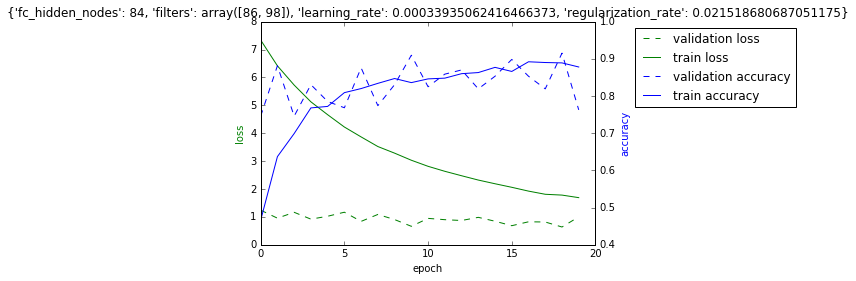

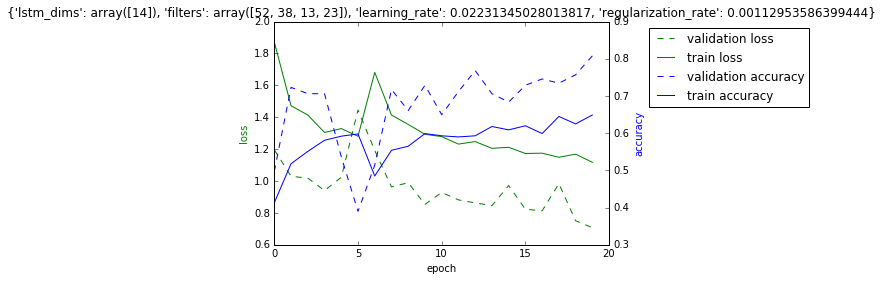

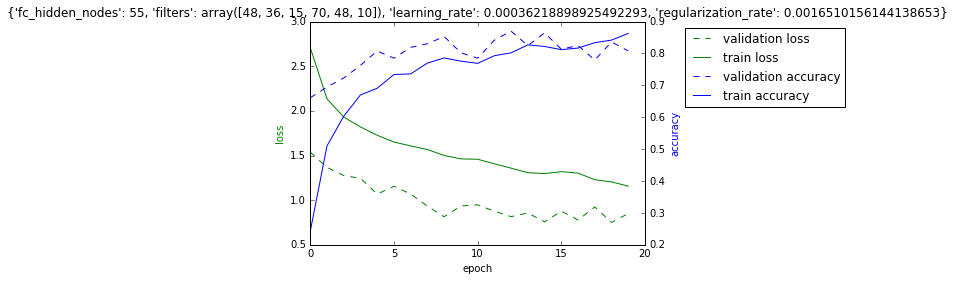

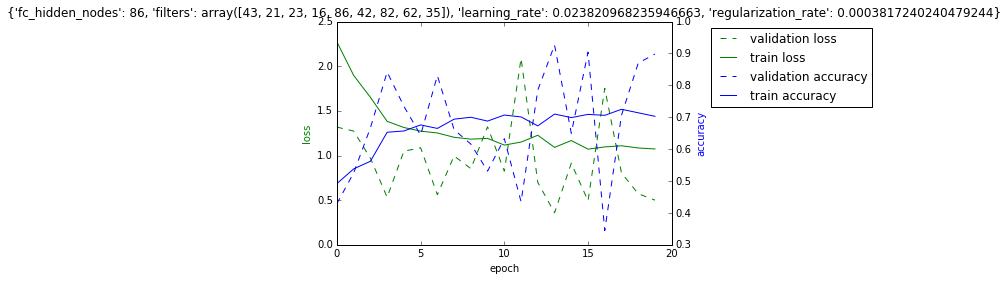

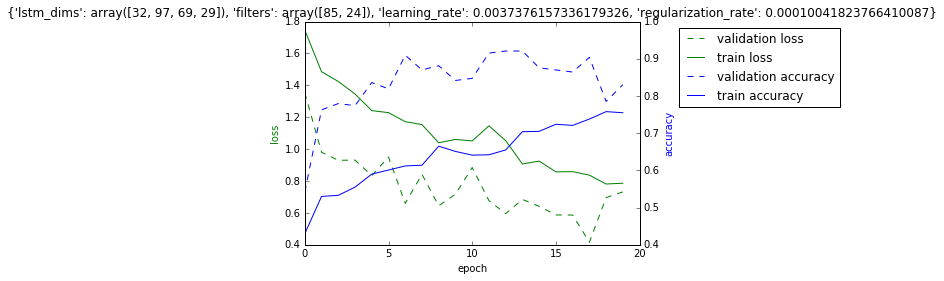

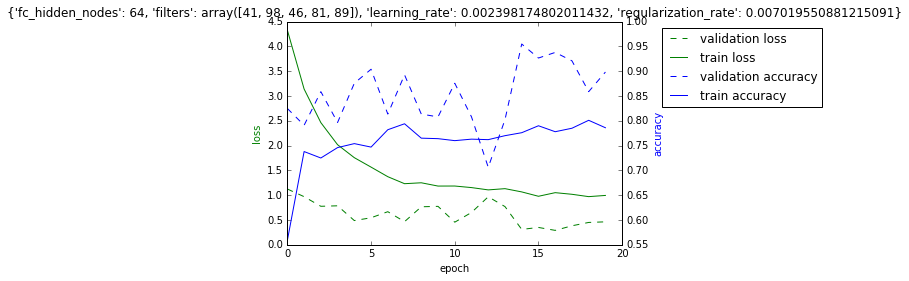

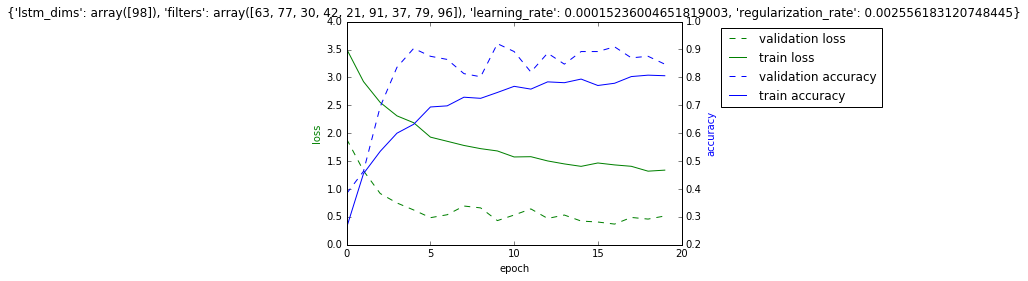

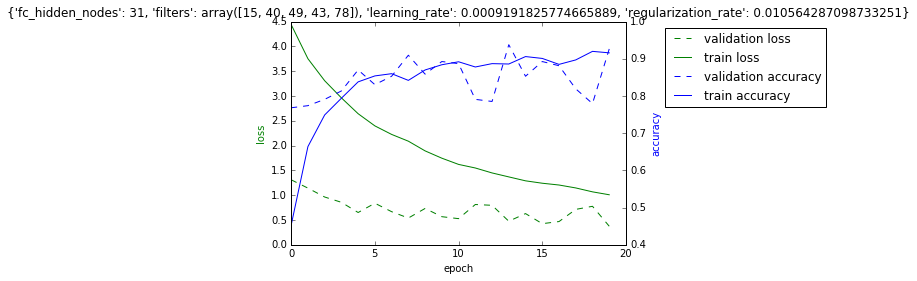

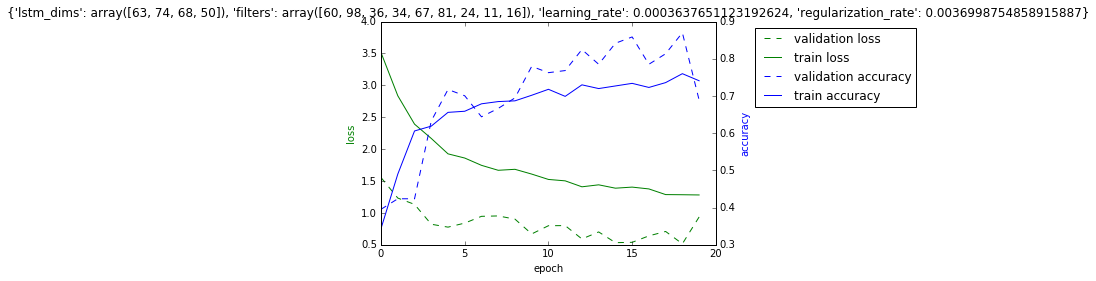

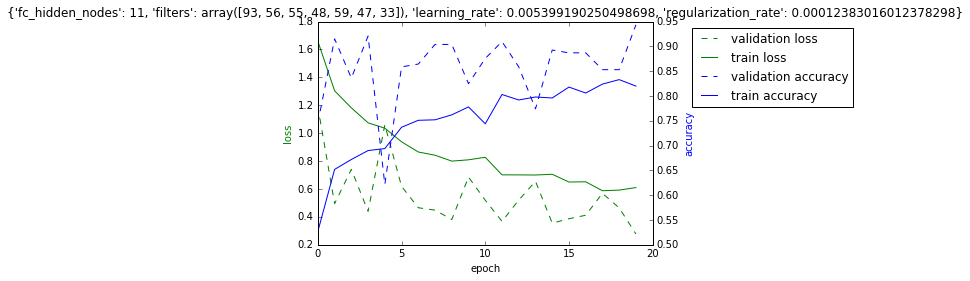

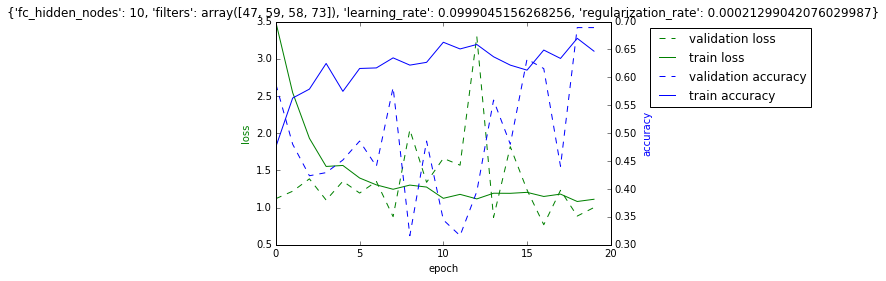

In [16]:
%%time
for i in range(len(models)):
    name = str(models[i][1])
    find_architecture.plotTrainingProcess(histories[i], name)

In [25]:
import pandas as pd
results = pd.DataFrame({'model':[str(params) for model, params, model_types in models],
                       'train_acc': [history.history['acc'][-1] for history in histories],
                       'train_loss': [history.history['loss'][-1] for history in histories],
                       'val_acc': [history.history['val_acc'][-1] for history in histories],
                       'val_loss': [history.history['val_loss'][-1] for history in histories]
                       })
results

/home/christiaan/anaconda3/lib/python3.5/site-packages/numexpr/cpuinfo.py:42: UserWarning: [Errno 12] Cannot allocate memory
  warnings.warn(str(e), UserWarning, stacklevel=stacklevel)


,model,train_acc,train_loss,val_acc,val_loss
0,"{'regularization_rate': 0.05141340232089523, '...",0.744601,1.964968,0.847458,0.840894
1,"{'regularization_rate': 0.0016240561341573274,...",0.840376,0.640527,0.847458,0.434046
2,"{'regularization_rate': 0.01775420525256537, '...",0.366197,1.908534,0.073446,1.934123
3,"{'regularization_rate': 0.006331259542878648, ...",0.900469,0.634891,0.881356,0.462786
4,"{'regularization_rate': 0.07688482118443922, '...",0.749296,1.630934,0.847458,0.604155
5,"{'regularization_rate': 0.004325918258097774, ...",0.229108,2.017849,0.033898,2.126440
6,"{'regularization_rate': 0.011478618823415783, ...",0.876995,0.984601,0.870056,0.657077
7,"{'regularization_rate': 0.009669580061613316, ...",0.221596,2.013223,0.033898,2.204916
8,"{'regularization_rate': 0.026815828052057622, ...",0.730516,1.164694,0.802260,0.719782
9,"{'regularization_rate': 0.008046900426925949, ...",0.609390,1.645486,0.468927,1.226830


In [19]:
results.to_csv(datapath+'results.csv')

## Train the best model for real

In [26]:
best_model_index = np.argmax(val_accuracies)
#best_model_index = 3

In [27]:
best_model, best_params, best_model_types = models[best_model_index]
print(best_model_index, best_model_types, best_params)

18 CNN {'regularization_rate': 0.0013090712648838273, 'filters': array([52, 98, 65, 85, 50]), 'fc_hidden_nodes': 73, 'learning_rate': 0.003916623601539885}


We make a copy of the model, to start training from fresh.

best_params were:


In [13]:
best_params = {'filters': np.array([128, 128, 128, 128, 128, 128]),
 'learning_rate': 0.0006895175537006324,
 'lstm_dims': np.array([128, 128, 128]),
 'regularization_rate': 0.1}  # 0.03755938050672786}

In [29]:
best_model_copy = modelgen.generate_CNN_model(X_train.shape, num_classes, best_params['filters'], 
                    best_params['fc_hidden_nodes'], best_params['learning_rate'], best_params['regularization_rate'])

In [ ]:
best_model_copy = modelgen.generate_CNN_model

In [30]:
best_model_copy.summary()

____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
batchnormalization_170 (BatchNormal(None, 20, 3)       6           batchnormalization_input_26[0][0]
____________________________________________________________________________________________________
convolution1d_67 (Convolution1D)   (None, 20, 52)      520         batchnormalization_170[0][0]     
____________________________________________________________________________________________________
batchnormalization_171 (BatchNormal(None, 20, 52)      104         convolution1d_67[0][0]           
____________________________________________________________________________________________________
activation_170 (Activation)        (None, 20, 52)      0           batchnormalization_171[0][0]     
___________________________________________________________________________________________

We're going to train the model on the complete data set, and save the model after each epoch

In [31]:
nr_epochs = 50
datasize = X_train.shape[0]
history = best_model_copy.fit(X_train[:datasize,:,:], y_train_binary[:datasize,:],
              nb_epoch=nr_epochs, validation_data=(X_val, y_val_binary), 
              callbacks=[keras.callbacks.ModelCheckpoint(datapath+'weights.{epoch:02d}-{val_loss:.2f}.hdf5')])

Train on 1065 samples, validate on 177 samples
Epoch 1/50
1065/1065 [==============================] - 4s - loss: 2.1614 - acc: 0.5606 - val_loss: 1.0528 - val_acc: 0.7571
Epoch 2/50
1065/1065 [==============================] - 3s - loss: 1.7027 - acc: 0.7230 - val_loss: 0.7326 - val_acc: 0.8814
Epoch 3/50
1065/1065 [==============================] - 4s - loss: 1.4841 - acc: 0.7596 - val_loss: 0.9412 - val_acc: 0.8023
Epoch 4/50
1065/1065 [==============================] - 3s - loss: 1.3377 - acc: 0.7690 - val_loss: 0.8550 - val_acc: 0.7571
Epoch 5/50
1065/1065 [==============================] - 4s - loss: 1.1982 - acc: 0.8103 - val_loss: 0.4933 - val_acc: 0.9040
Epoch 6/50
1065/1065 [==============================] - 4s - loss: 1.1953 - acc: 0.7765 - val_loss: 0.6086 - val_acc: 0.8475
Epoch 7/50
1065/1065 [==============================] - 4s - loss: 1.0907 - acc: 0.7991 - val_loss: 0.3523 - val_acc: 0.9266
Epoch 8/50
1065/1065 [==============================] - 4s - loss: 1.0231 - ac

If we plot the training process, we see that the model is probably already overfitting in the first epoch. 

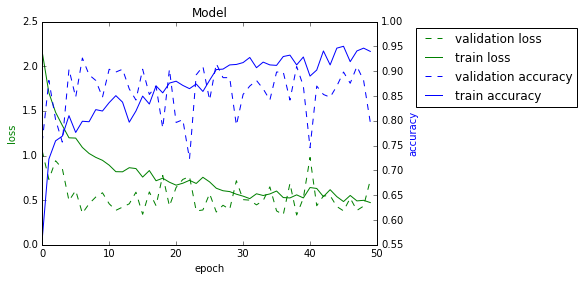

In [32]:
find_architecture.plotTrainingProcess(history)

In [87]:
model_copy.evaluate(X_train, y_train_binary)

NameError: name 'model_copy' is not defined

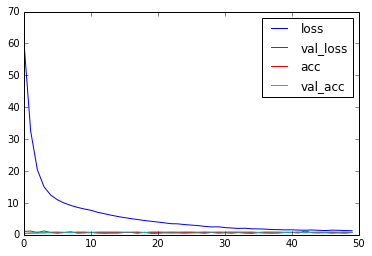

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.plot(acc, label='acc')
plt.plot(val_acc, label='val_acc')
plt.legend()

## Inspect model predictions

In [18]:
datasize = X_val.shape[0]
probs = best_model_copy.predict_proba(X_val[:datasize,:,:],batch_size=1)
probs

177/177 [==============================] - 16s    


array([[ 0.00404649,  0.9338243 ,  0.00897419, ...,  0.00437421,
         0.02954395,  0.00305465],
       [ 0.00583863,  0.00560817,  0.00424344, ...,  0.00586881,
         0.01682824,  0.01507087],
       [ 0.00427617,  0.00304395,  0.00393208, ...,  0.00514588,
         0.0355429 ,  0.07089292],
       ..., 
       [ 0.00608318,  0.00639111,  0.00472389, ...,  0.00624966,
         0.02528735,  0.01861044],
       [ 0.004137  ,  0.9335357 ,  0.00910191, ...,  0.00445588,
         0.02879061,  0.00308947],
       [ 0.00567642,  0.00328553,  0.00362628, ...,  0.00617196,
         0.01732735,  0.06340116]])

In [79]:
len(best_model.layers)

10

In [82]:
best_model_copy.layers[0].get_weights()

[array([ 1.05805969,  1.08182418,  1.05226934,  1.11985362,  1.11457896,
         1.08258474,  1.0675174 ,  1.09842944,  1.04272151], dtype=float32),
 array([-0.01621632,  0.00915477,  0.03112106, -0.00480812, -0.04024399,
         0.02938126,  0.02135731,  0.02876085,  0.02071398], dtype=float32),
 array([-5.03031445,  4.6670599 ,  3.88478112,  9.46627522,  0.05378294,
        -2.32858896,  0.26191753,  7.91399288, -1.74101698], dtype=float32),
 array([ 6.4479332 ,  6.31256723,  4.06258011,  6.53865671,  8.00042725,
         3.90192032,  1.78485167,  4.96417904,  4.87879181], dtype=float32)]

In [83]:
from keras import backend as K

# with a Sequential model
get_dens_layer_output = K.function([best_model_copy.layers[0].input, K.learning_phase()],
                                  [best_model_copy.layers[0].output])
layer_output = get_dens_layer_output([X_val, 0])[0]
layer_output

array([[[  9.14543152e-01,  -5.22749007e-01,   1.20961297e+00, ...,
           1.27866900e+00,  -1.36577868e+00,   2.07329273e+00],
        [  8.51596296e-01,  -4.23463970e-01,   1.41696489e+00, ...,
           9.61874366e-01,  -1.32358003e+00,   2.09593701e+00],
        [  8.29028249e-01,  -3.18831891e-01,   1.48567891e+00, ...,
           6.45163417e-01,  -1.36463904e+00,   2.12711763e+00],
        ..., 
        [  8.33073676e-01,  -5.33392504e-02,   1.30498242e+00, ...,
           3.66124213e-01,  -1.23794603e+00,   2.32352901e+00],
        [  8.69708896e-01,  -4.08081971e-02,   1.27587688e+00, ...,
           3.05379510e-01,  -1.22057402e+00,   2.41411233e+00],
        [  8.45695853e-01,  -8.58338997e-02,   1.32538247e+00, ...,
           3.95880163e-01,  -1.22073758e+00,   2.40642452e+00]],

       [[  8.95305097e-01,  -1.51136845e-01,   1.34682620e+00, ...,
           2.57436574e-01,  -1.26235223e+00,   2.38910627e+00],
        [  8.70019019e-01,  -1.90006688e-01,   1.33645797e+0

In [26]:
best_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
batchnormalization_5 (BatchNormal(None, 512, 9)        18          batchnormalization_input_5[0][0] 
____________________________________________________________________________________________________
convolution1d_10 (Convolution1D) (None, 512, 98)       2744        batchnormalization_5[0][0]       
____________________________________________________________________________________________________
activation_18 (Activation)       (None, 512, 98)       0           convolution1d_10[0][0]           
____________________________________________________________________________________________________
convolution1d_11 (Convolution1D) (None, 512, 67)       19765       activation_18[0][0]              
___________________________________________________________________________________________

In [17]:
score_val = best_model_copy.evaluate(X_val, y_val_binary, verbose=True)
score_val

NameError: name 'best_model_copy' is not defined

## Test on Testset

In [42]:
score_test = best_model_copy.evaluate(X_test, y_test_binary, verbose=False)
print('Score of best model: ' + str(score_test))

Score of best model: [0.77839173626255342, 0.8000000032218727]


In [36]:
model.metrics_names

['loss', 'acc']